## 一、数据的加载和预处理

### 加载库

In [1]:
import numpy as np
import pandas as pd

### 读入数据

In [5]:
OnlRt=pd.read_csv('./Data/data/OnlineRetail.csv',
                  usecols=['CustomerID','InvoiceDate','UnitPrice','Quantity','Country'],
                  encoding = "ISO-8859-1",
                  parse_dates=['InvoiceDate'],
                  dtype={'CustomerID':str,'UnitPrice':np.float32,'Quantity':np.int32,'Country':str})

In [6]:
OnlRt.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
OnlRt.shape

(541909, 5)

In [9]:
OnlRt.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.059570
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.714073


In [10]:
OnlRt.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


### 数据清理

In [11]:
neg_id=OnlRt[(OnlRt['Quantity']<=0)|(OnlRt['UnitPrice']<=0)].loc[:,'CustomerID']
data0=OnlRt[(OnlRt['CustomerID'].notnull())&
            (~OnlRt['CustomerID'].isin(neg_id))&
            (OnlRt['Country']=='United Kingdom')].drop('Country',axis=1)

In [12]:
data0.shape

(140381, 4)

### 找出第一次交易时间

In [21]:
data1=data0.assign(amount=data0['UnitPrice'].multiply(data0['Quantity']))
first_time=data1['InvoiceDate'].sort_values(ascending=True).groupby(data1['CustomerID']).nth(0)\
.apply(lambda x:x.date()).reset_index().rename(columns={'InvoiceDate':'first_time', 'index':'CustomerID'})
data2=pd.merge(data1,first_time,how='left',on=['CustomerID'])

ValueError: You are trying to merge on object and int64 columns for key 'CustomerID'. If you wish to proceed you should use pd.concat

In [25]:
first_time.CustomerID.dtype

dtype('int64')

In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140381 entries, 46 to 541701
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     140381 non-null  int32         
 1   InvoiceDate  140381 non-null  datetime64[ns]
 2   UnitPrice    140381 non-null  float32       
 3   CustomerID   140381 non-null  object        
 4   amount       140381 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 9.4+ MB


In [65]:
first_time=data1['InvoiceDate'].sort_values(ascending=True).groupby(data1['CustomerID']).nth(0)\
.apply(lambda x:x.date()).reset_index().rename(columns={'InvoiceDate':'first_time', 'index':'CustomerID'})

In [66]:
first_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  2534 non-null   int64 
 1   first_time  2534 non-null   object
dtypes: int64(1), object(1)
memory usage: 39.7+ KB


In [67]:
first_time = first_time.astype({'CustomerID':data1.CustomerID.dtype, 'first_time':'object'})

In [68]:
first_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  2534 non-null   object
 1   first_time  2534 non-null   object
dtypes: object(2)
memory usage: 39.7+ KB


In [72]:
first_time.CustomerID.dtype == data1.CustomerID.dtype

True

In [69]:
data2=pd.merge(data1,first_time,how='left',on=['CustomerID'])

In [71]:
data2.first_time.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: first_time, dtype: object

In [78]:
len(set(first_time.CustomerID.to_list()) & set(data1.CustomerID.to_list()))

0

In [82]:
first_time.CustomerID.min()

46

In [83]:
data1.CustomerID.min()

'12747'

In [84]:
first_time.CustomerID.dtype == data1.CustomerID.dtype

True

In [85]:
print(first_time.dtypes)
print(data1.dtypes)

CustomerID    object
first_time    object
dtype: object
Quantity                int32
InvoiceDate    datetime64[ns]
UnitPrice             float32
CustomerID             object
amount                float64
dtype: object


In [86]:
first_time.CustomerID = first_time.CustomerID.astype('str')

In [87]:
first_time.CustomerID.min()

'100021'

In [88]:
first_time.CustomerID.dtype == data1.CustomerID.dtype

True

In [89]:
data2=pd.merge(data1,first_time,how='left',on=['CustomerID'])

In [90]:
data2.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,amount,first_time
0,80,2010-12-01 09:00:00,2.55,13748,203.999996,NaN
1,12,2010-12-01 09:45:00,0.85,16098,10.200000,NaN
2,8,2010-12-01 09:45:00,3.75,16098,30.000000,NaN
3,12,2010-12-01 09:45:00,1.65,16098,19.800000,NaN
4,10,2010-12-01 09:45:00,1.95,16098,19.500000,NaN


In [92]:
set(first_time.CustomerID.to_list()) & set(data1.CustomerID.to_list())

{'13160',
 '13194',
 '13233',
 '13978',
 '14609',
 '14628',
 '14689',
 '15043',
 '16986',
 '17154',
 '17221',
 '17408',
 '17668',
 '17930',
 '18004',
 '18120'}

In [93]:
# 将 data1 中的 CustomerID 列转换为字符串类型
data1['CustomerID'] = data1['CustomerID'].astype(str)

# 将 first_time 中的 CustomerID 列转换为字符串类型
first_time['CustomerID'] = first_time['CustomerID'].astype(str)

In [95]:
set(first_time.CustomerID.to_list()) & set(data1.CustomerID.to_list())

{'13160',
 '13194',
 '13233',
 '13978',
 '14609',
 '14628',
 '14689',
 '15043',
 '16986',
 '17154',
 '17221',
 '17408',
 '17668',
 '17930',
 '18004',
 '18120'}

In [97]:
data0.CustomerID.describe()

count     140381
unique      2534
top        13263
freq        1677
Name: CustomerID, dtype: object

In [99]:
data0.CustomerID.sort_values()

175874    12747
241993    12747
241994    12747
241995    12747
241996    12747
          ...  
198736    18287
198735    18287
198734    18287
392727    18287
198722    18287
Name: CustomerID, Length: 140381, dtype: object

In [111]:
tmp = data1['InvoiceDate'].sort_values(ascending=True).groupby(data1['CustomerID']).nth(0)

In [112]:
tmp

46       2010-12-01 09:00:00
153      2010-12-01 09:45:00
163      2010-12-01 09:53:00
174      2010-12-01 09:56:00
196      2010-12-01 09:59:00
                 ...        
534536   2011-12-07 14:12:00
536976   2011-12-08 10:33:00
537265   2011-12-08 10:58:00
538064   2011-12-08 13:11:00
538823   2011-12-08 14:58:00
Name: InvoiceDate, Length: 2534, dtype: datetime64[ns]

In [109]:
data1.index.min()

46

In [110]:
tmp.shape

(2534,)

In [116]:
first_time = data1['InvoiceDate'].sort_values(ascending=True).groupby(data1['CustomerID']).nth(0).reset_index()
first_time['first_time'] = first_time['InvoiceDate'].apply(lambda x: x.date())
first_time = first_time[['CustomerID', 'first_time']]

KeyError: "['CustomerID'] not in index"

In [117]:
first_time

,index,InvoiceDate,first_time
0,46,2010-12-01 09:00:00,2010-12-01
1,153,2010-12-01 09:45:00,2010-12-01
2,163,2010-12-01 09:53:00,2010-12-01
3,174,2010-12-01 09:56:00,2010-12-01
4,196,2010-12-01 09:59:00,2010-12-01
...,...,...,...
2529,534536,2011-12-07 14:12:00,2011-12-07
2530,536976,2011-12-08 10:33:00,2011-12-08
2531,537265,2011-12-08 10:58:00,2011-12-08
2532,538064,2011-12-08 13:11:00,2011-12-08


In [125]:
tmp = data1['InvoiceDate'].sort_values(ascending=True).groupby(data1['CustomerID']).rank(ascending=True, method='dense')

In [129]:
len(tmp.index[tmp==1].to_list())

57864

In [133]:
data1['rk'] = data1['InvoiceDate'].sort_values(ascending=True).groupby(data1['CustomerID']).rank(ascending=True, method='dense')

In [134]:
data1.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,amount,rk
46,80,2010-12-01 09:00:00,2.55,13748,203.999996,1.0
142,12,2010-12-01 09:45:00,0.85,16098,10.200000,1.0
143,8,2010-12-01 09:45:00,3.75,16098,30.000000,1.0
144,12,2010-12-01 09:45:00,1.65,16098,19.800000,1.0
145,10,2010-12-01 09:45:00,1.95,16098,19.500000,1.0


In [137]:
data1[data1.CustomerID=='16098'].sort_values('InvoiceDate')

,Quantity,InvoiceDate,UnitPrice,CustomerID,amount,rk
142,12,2010-12-01 09:45:00,0.85,16098,10.200000,1.0
143,8,2010-12-01 09:45:00,3.75,16098,30.000000,1.0
144,12,2010-12-01 09:45:00,1.65,16098,19.800000,1.0
145,10,2010-12-01 09:45:00,1.95,16098,19.500000,1.0
146,10,2010-12-01 09:45:00,2.10,16098,20.999999,1.0
...,...,...,...,...,...,...
337946,3,2011-09-13 09:59:00,3.75,16098,11.250000,8.0
337945,2,2011-09-13 09:59:00,3.75,16098,7.500000,8.0
337956,24,2011-09-13 09:59:00,2.08,16098,49.919998,8.0
337950,10,2011-09-13 09:59:00,2.08,16098,20.799999,8.0


In [138]:
data1.shape

(140381, 6)

In [139]:
data1["first_time"] = data1.InvoiceDate.apply(lambda x: x.date())

In [140]:
data2.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,amount,first_time
0,80,2010-12-01 09:00:00,2.55,13748,203.999996,NaN
1,12,2010-12-01 09:45:00,0.85,16098,10.200000,NaN
2,8,2010-12-01 09:45:00,3.75,16098,30.000000,NaN
3,12,2010-12-01 09:45:00,1.65,16098,19.800000,NaN
4,10,2010-12-01 09:45:00,1.95,16098,19.500000,NaN


In [ ]:
data2 = data1[data1.rk == 1.0]['Quantity', 'first_time', 'UnitPrice', 'CustomerID', 'amount']

In [155]:
data1 = data1.drop(["rk","first_time"], axis=1)

In [141]:
first_time = data1.groupby('CustomerID')['InvoiceDate'].min().reset_index()

In [143]:
first_time['first_time'] = first_time.InvoiceDate.apply(lambda x: x.date())

In [144]:
first_time

,CustomerID,InvoiceDate,first_time
0,12747,2010-12-05 15:38:00,2010-12-05
1,12820,2011-01-17 12:34:00,2011-01-17
2,12821,2011-05-09 15:51:00,2011-05-09
3,12823,2011-02-16 12:15:00,2011-02-16
4,12824,2011-10-11 12:49:00,2011-10-11
...,...,...,...
2529,18278,2011-09-27 11:58:00,2011-09-27
2530,18280,2011-03-07 09:52:00,2011-03-07
2531,18281,2011-06-12 10:53:00,2011-06-12
2532,18283,2011-01-06 14:14:00,2011-01-06


In [156]:
first_time = first_time.drop("InvoiceDate", axis=1)

In [157]:
data2=pd.merge(data1,first_time,how='left',on=['CustomerID'])

In [158]:
data2.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,amount,first_time
0,80,2010-12-01 09:00:00,2.55,13748,203.999996,2010-12-01
1,12,2010-12-01 09:45:00,0.85,16098,10.200000,2010-12-01
2,8,2010-12-01 09:45:00,3.75,16098,30.000000,2010-12-01
3,12,2010-12-01 09:45:00,1.65,16098,19.800000,2010-12-01
4,10,2010-12-01 09:45:00,1.95,16098,19.500000,2010-12-01


### 添加新特征

In [159]:
dayth=(data2['InvoiceDate'].apply(lambda x: x.date())-data2['first_time']).apply(lambda x: x.days)

In [160]:
month=data2['InvoiceDate'].apply(lambda x: x.month)
weekday=data2['InvoiceDate'].apply(lambda x: x.weekday())
hour=data2['InvoiceDate'].apply(lambda x: x.hour)
minute=data2['InvoiceDate'].apply(lambda x: x.minute)
second=data2['InvoiceDate'].apply(lambda x: x.second)

In [161]:
hour_preci=(second/60+minute)/60+hour

### 整合特征

In [162]:
data3=data2.assign(dayth=dayth).assign(hour=hour_preci).\
assign(weekday=weekday).drop(['first_time','InvoiceDate'],axis=1).\
sort_values(by=['CustomerID','dayth','hour'])

In [164]:
data3.head()

,Quantity,UnitPrice,CustomerID,amount,dayth,hour,weekday
3205,12,2.55,12747,30.599999,0,15.633333,6
3206,6,2.55,12747,15.300000,0,15.633333,6
3207,16,1.69,12747,27.040001,0,15.633333,6
3208,24,1.65,12747,39.599999,0,15.633333,6
3209,6,5.45,12747,32.699999,0,15.633333,6


In [167]:
data3.describe()

,Quantity,UnitPrice,amount,dayth,hour,weekday
count,140381.000000,140381.000000,140381.000000,140381.00000,140381.000000,140381.000000
mean,8.973244,2.777895,14.087602,94.56445,13.423363,2.816343
std,37.246793,6.844531,40.202873,112.05215,2.116587,2.018826
min,1.000000,0.001000,0.001000,0.00000,7.583333,0.000000
25%,1.000000,1.250000,3.300000,0.00000,12.000000,1.000000
50%,4.000000,1.690000,8.250000,40.00000,13.350000,3.000000
75%,10.000000,3.250000,16.349999,176.00000,14.883333,4.000000
max,4300.000000,2033.099976,3861.000000,372.00000,20.266667,6.000000


### 分离特征数据和值数据

In [168]:
X=data3[data3['dayth']<28].set_index('CustomerID').drop('amount',axis=1).sort_index()

In [169]:
data180=data3[(data3['dayth']<180)&(data3['CustomerID'].isin(X.index))]
y=data180['amount'].groupby(data180['CustomerID']).sum().sort_index()

In [178]:
X.shape

(66001, 5)

In [179]:
y.shape

(2534,)

### 保存文件

In [170]:
X.to_csv('./Data/bookdata_X.csv',index=True,header=True)
y.to_csv('./Data/bookdata_y.csv',index=True,header=True)

## 二、输入数据的准备

### 加载库

In [172]:
!pip install keras -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host mirrors.aliyun.com

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.6 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.8/523.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 2.3 MB/s eta 0:00:0000:0100:01


In [174]:
!pip install tensorflow -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host mirrors.aliyun.com

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 1.5 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: ml-dtypes
    Found existi

In [175]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Conv1D, Dropout, LSTM, TimeDistributed, Bidirectional, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

2024-07-29 19:40:34.285069: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 读取文件

In [177]:
columns_picked=['CustomerID','Quantity', 'UnitPrice', 'dayth', 'hour', 'weekday']

y=pd.read_csv('./Data/bookdata_y.csv').rename(columns={'CustomerID':'id'}).set_index('id')['amount']
X=pd.read_csv('./Data/bookdata_X.csv',usecols=columns_picked
             ).rename(columns={'CustomerID':'id'}).set_index('id')
columns_picked.remove('CustomerID')

### 分离训练集和测试集

In [180]:
indices=y.index.tolist()
ind_train,ind_test=map(sorted,train_test_split(indices, test_size=0.25,
                                               random_state=42))

X_train=X.loc[ind_train,:]
y_train=y[ind_train]

X_test=X.loc[ind_test,:]
y_test=y[ind_test]

### 数据标准化

In [181]:
scaler=MinMaxScaler(feature_range=(-0.5,0.5))
X_train_scaled =pd.DataFrame(scaler.fit_transform(X_train),
                             columns=X_train.columns,
                             index=X_train.index)

In [200]:
y_train_log=y_train.apply(np.log)

(0.0, 10.0, 0.0, 250.0)

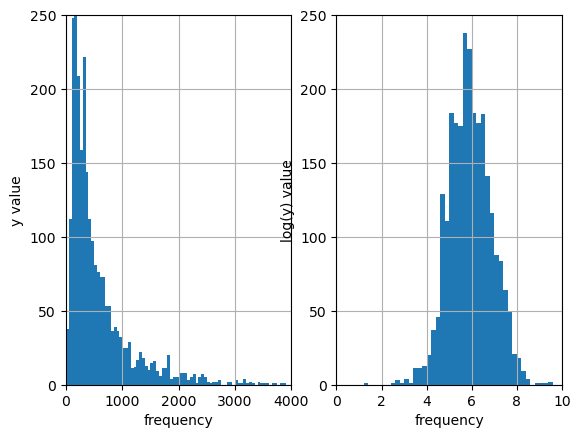

In [182]:
plt.figure();
plt.subplot(1,2,1)
y.hist(bins=np.arange(0,4000,50))
plt.xlabel('frequency')
plt.ylabel('y value')
plt.grid('off')
plt.axis([0,4000,0,250])
plt.subplot(1,2,2)
y.apply(np.log).hist(bins=np.arange(0,10,0.2))
plt.xlabel('frequency')
plt.ylabel('log(y) value')
plt.grid('off')
plt.axis([0,10,0,250])

### 数据形状的处理

In [183]:
week_train=X_train['dayth'].apply(lambda x: int(x/7)).rename('week')

In [184]:
inner_length=32
outer_length=4
feature_len=len(columns_picked)

In [185]:
def cut_pad(x,maxl):
    head=np.array(x)[0:maxl]
    head_padding=head if len(head)==maxl else np.pad(head,(0,maxl-len(head)),mode='constant')
    return head_padding

In [186]:
def feature_array(df, col_n, week,len_outer,len_inner):
    col=df[[col_n]].assign(week=week).reset_index()

    ids=col['id'].drop_duplicates().values.tolist()
    weeks=np.arange(0,len_outer).tolist()

    id_week=pd.DataFrame([(id,week) for id in ids for week in weeks]).rename(columns={0:'id',
                                                                                      1:'week'}).sort_values(by=['id','week'])

    arr_base=pd.merge(id_week, col, how='left',on=['id','week']).fillna(0)

    arr_frame=arr_base[col_n].groupby([arr_base['id'],arr_base['week']]).\
    apply(lambda x: cut_pad(x,len_inner)).reset_index().drop('week',axis=1).set_index('id')[col_n]

    userarray=arr_frame.groupby(arr_frame.index).apply(np.vstack).\
    apply(lambda x: x.reshape([1,x.shape[0],x.shape[1]])).sort_index()
    userarray_var=np.vstack(userarray.values.tolist())

    return userarray.index.tolist(),userarray_var

In [187]:
def make_data_array(df,columns,week,len_outer,len_inner):
    ids_num = len(set(df.index))

    df_ready = np.zeros([ids_num,len_outer,len_inner,len(columns)])
    for i,item in enumerate(columns):
        the_ind, df_ready[:,:,:,i] = feature_array(df,item,week,len_outer,len_inner)

    return the_ind,df_ready

In [188]:
X_train_ind,X_train_data=make_data_array(X_train_scaled,columns_picked,week_train,outer_length,inner_length)

In [190]:
X_train_data.shape

(1900, 4, 32, 5)

In [196]:
X_test_scaled =pd.DataFrame(scaler.transform(X_test),
                            columns=X_test.columns,
                            index=X_test.index)

y_test_log=y_test.apply(np.log)

week_test=X_test['dayth'].apply(lambda x: int(x/7)).rename('week')

X_test_ind,X_test_data=make_data_array(X_test_scaled,columns_picked,week_test,outer_length,inner_length)

## 三、模型搭建和训练

### 模型搭建

In [191]:
def build_model(len_outer,len_inner,len_fea):
    filters = [64,32]
    kernel_size = [2,2]
    dropout_rate=[0.1,0]

    inner_input = Input(shape=(len_inner,len_fea), dtype='float32')
    cnn1d=inner_input
    for i in range(len(filters)):
        cnn1d = Conv1D(filters=filters[i],
                       kernel_size=kernel_size[i],
                       padding='valid',
                       activation='relu',
                       strides=1)(cnn1d)
        cnn1d = Dropout(dropout_rate[i])(cnn1d)
    lstm = LSTM(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(cnn1d)
    inner_output = LSTM(16, return_sequences=False)(lstm)
    inner_model = Model(inputs=inner_input, outputs=inner_output)

    outer_input = Input(shape=(len_outer, len_inner,len_fea), dtype='float32')
    innered = TimeDistributed(inner_model)(outer_input)
    outered=Bidirectional(LSTM(16, return_sequences=False))(innered)
    outered = Dense(8, activation='relu')(outered)
    outer_output = Dense(1)(outered)

    model = Model(inputs=outer_input, outputs=outer_output)
    model.compile(loss='mape', optimizer='adam')

    return model,inner_model

In [192]:
LTV_model, LTV_inner_model = build_model(outer_length,inner_length,feature_len)

In [193]:
LTV_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4, 32, 5)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 4, 16)          │        16,288 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,785 (81.19 KB)

 Trainable params: 20,785 (81.19 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
LTV_inner_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 31, 64)         │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 30, 32)         │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,288 (63.62 KB)

 Trainable params: 16,288 (63.62 KB)

 Non-trainable params: 0 (0.00 B)

### 模型训练

In [201]:
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

history = LTV_model.fit(x=X_train_data,
                        y=y_train_log,
                        validation_data=(X_test_data, y_test_log),
                        epochs=200,
                        batch_size=128,
                        callbacks=[cb],
                        verbose=2)

LTV_model.save('LTV_model.h5')

Epoch 1/200
15/15 - 16s - 1s/step - loss: 99.2648 - val_loss: 97.6982
Epoch 2/200
15/15 - 1s - 87ms/step - loss: 91.8202 - val_loss: 82.1430
Epoch 3/200
15/15 - 1s - 94ms/step - loss: 72.6235 - val_loss: 61.1747
Epoch 4/200
15/15 - 2s - 110ms/step - loss: 50.2163 - val_loss: 38.1295
Epoch 5/200
15/15 - 1s - 99ms/step - loss: 28.2212 - val_loss: 18.6061
Epoch 6/200
15/15 - 1s - 98ms/step - loss: 15.0943 - val_loss: 12.3563
Epoch 7/200
15/15 - 1s - 97ms/step - loss: 13.5547 - val_loss: 12.3685
Epoch 8/200
15/15 - 2s - 100ms/step - loss: 13.4568 - val_loss: 12.3170
Epoch 9/200
15/15 - 2s - 102ms/step - loss: 13.3513 - val_loss: 12.3380
Epoch 10/200
15/15 - 2s - 105ms/step - loss: 13.3518 - val_loss: 12.3210
Epoch 11/200
15/15 - 2s - 108ms/step - loss: 13.3514 - val_loss: 12.3107
Epoch 12/200
15/15 - 2s - 106ms/step - loss: 13.3528 - val_loss: 12.3168
Epoch 13/200
15/15 - 2s - 104ms/step - loss: 13.3538 - val_loss: 12.3302
Epoch 14/200
15/15 - 2s - 105ms/step - loss: 13.3517 - val_loss: 12

### 模型分析

(0.0, 200.0, 0.0, 100.0)

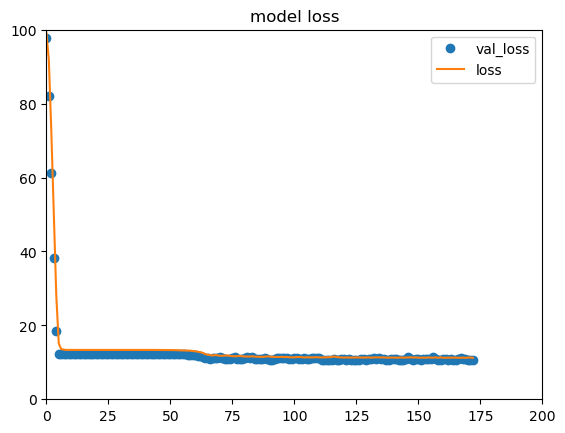

In [202]:
plt.figure()
plt.plot(history.history['val_loss'],'o',label='val_loss')
plt.plot(history.history['loss'],'-',label='loss')
plt.title('model loss')
plt.legend()
plt.axis([0,200,0,100])